In [103]:
# load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.linear_model import LogisticRegression
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import scipy.stats as st
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.externals.six import StringIO
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier 
from datetime import datetime
from datetime import date
import pydot 

In [104]:
data = pd.read_csv("Fifa18.csv")
data['club'].fillna("Unknown Club", inplace=True)
data.fillna( 0 , inplace=True)

In [ ]:
#Predicting the physical of each player

In [4]:
# partition dataset into training, validation, and test sets using holdout method
X_train, X_test, Y_train, Y_test = train_test_split(data[['agility','reactions','balance','shot_power','jumping','stamina','strength','aggression','vision','interceptions','positioning','long_shots']], data['phy'], test_size = 0.25, random_state = 1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 1)

In [5]:
# evaluate model with two predictors
model = linear_model.LinearRegression().fit(X = X_train[['stamina','strength']], y = Y_train)
score_train = model.score(X = X_train[['stamina','strength']], y = Y_train) # R squared (training)
score_val = model.score(X = X_val[['stamina','strength']], y = Y_val) # R squared (validation)
score_test = model.score(X = X_test[['stamina','strength']], y = Y_test) # R squared (test)
print([score_train, score_val, score_test])

[0.7492735923895772, 0.7579225484804144, 0.7694912006371173]


In [6]:
# evaluate model with three predictors
model = linear_model.LinearRegression().fit(X = X_train[['aggression','interceptions','positioning']], y = Y_train)
score_train = model.score(X = X_train[['aggression','interceptions','positioning']], y = Y_train) # R squared (training)
score_val = model.score(X = X_val[['aggression','interceptions','positioning']], y = Y_val) # R squared (validation)
score_test = model.score(X = X_test[['aggression','interceptions','positioning']], y = Y_test) # R squared (test)
print([score_train, score_val, score_test])

[0.4461684679652359, 0.45483628737416837, 0.43415742237592125]


In [7]:
# evaluate model with multiple predictors
model = linear_model.LinearRegression().fit(X = X_train[['aggression','vision','interceptions','positioning','long_shots']], y = Y_train)
score_train = model.score(X = X_train[['aggression','vision','interceptions','positioning','long_shots']], y = Y_train) # R squared (training)
score_val = model.score(X = X_val[['aggression','vision','interceptions','positioning','long_shots']], y = Y_val) # R squared (validation)
score_test = model.score(X = X_test[['aggression','vision','interceptions','positioning','long_shots']], y = Y_test) # R squared (test)
print([score_train, score_val, score_test])

[0.44805223865800947, 0.4575893859496981, 0.43599476636439133]


In [ ]:
# corelation coefficient between phy and relevant attritubes
print(data['phy'].corr(data['agility']))
print(data['phy'].corr(data['reactions']))
print(data['phy'].corr(data['balance']))
print(data['phy'].corr(data['jumping']))
print(data['phy'].corr(data['stamina']))
print(data['phy'].corr(data['shot_power']))
print(data['phy'].corr(data['strength']))
print(data['phy'].corr(data['aggression']))
print(data['phy'].corr(data['interceptions']))
print(data['phy'].corr(data['positioning']))
print(data['phy'].corr(data['gk_kicking']))
print(data['phy'].corr(data['long_shots']))
print(data['phy'].corr(data['vision']))

In [8]:
# evaluate ridge regression model
model = linear_model.Ridge(alpha = 1).fit(X = X_train[['jumping','stamina','strength','aggression','agility']], y = Y_train)
print(model.coef_)
print(model.intercept_)
score_train = model.score(X = X_train[['jumping','stamina','strength','aggression','agility']], y = Y_train) # R squared (training)
score_val = model.score(X = X_val[['jumping','stamina','strength','aggression','agility']], y = Y_val) # R squared (validation)
score_test = model.score(X = X_test[['jumping','stamina','strength','aggression','agility']], y = Y_test) # R squared (test)
print([score_train, score_val, score_test])

[ 0.10802368  0.09651155  0.47777241  0.11674329 -0.08957628]
19.64422584880731
[0.7970773040365376, 0.808749905739796, 0.8132664557107897]


In [9]:
# evaluate elastic net model
model = linear_model.ElasticNet(alpha = 1, l1_ratio = 0.5).fit(X = X_train[['jumping','stamina','strength','aggression','agility']], y = Y_train)
print(model.coef_)
print(model.intercept_)
score_train = model.score(X = X_train[['jumping','stamina','strength','aggression','agility']], y = Y_train) # R squared (training)
score_val = model.score(X = X_val[['jumping','stamina','strength','aggression','agility']], y = Y_val) # R squared (validation)
score_test = model.score(X = X_test[['jumping','stamina','strength','aggression','agility']], y = Y_test) # R squared (test)
print([score_train, score_val, score_test])

[ 0.10474238  0.09211465  0.47607083  0.11788591 -0.08456184]
19.866207335243168
[0.7969960284419845, 0.8084484821657405, 0.8129462342453978]


In [10]:
# evaluate LASSO regression model
model = linear_model.Lasso(alpha = 1).fit(X = X_train, y = Y_train)
print(model.coef_)
print(model.intercept_)
score_train = model.score(X = X_train, y = Y_train) # R squared (training)
score_val = model.score(X = X_val, y = Y_val) # R squared (validation)
score_test = model.score(X = X_test, y = Y_test) # R squared (test)
print([score_train, score_val, score_test])

[-0.00955455  0.23963295 -0.0718143  -0.04869136  0.07015368  0.1764382
  0.41895187  0.15075159  0.04212542 -0.0513066  -0.11417077 -0.00552565]
12.430688867688396
[0.8733086495645167, 0.883817694873535, 0.8875127258175077]


In [11]:
#Predicting the values using LASSO regression model
X= data[['agility','reactions','balance','shot_power','jumping','stamina','strength','aggression','vision','interceptions','positioning','long_shots']]
predictions=model.predict(X)
data['phy_prediction']=predictions
data

,ID,name,full_name,club,club_logo,special,league,birth_date,height_cm,weight_kg,...,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,phy_prediction
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,Spanish Primera División,2/5/1985,185,80,...,False,False,False,False,False,False,False,False,False,82.132408
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,Spanish Primera División,6/24/1987,170,72,...,False,False,False,False,False,False,False,False,False,64.537864
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,French Ligue 1,2/5/1992,175,68,...,False,False,False,False,False,False,False,False,False,62.327314
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,Spanish Primera División,1/24/1987,182,86,...,False,False,False,False,False,False,False,False,False,81.624280
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,German Bundesliga,3/27/1986,193,92,...,False,False,False,False,False,False,False,False,True,80.903059
5,188545,R. Lewandowski,Robert Lewandowski,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,2146,German Bundesliga,8/21/1988,185,79,...,False,False,False,False,False,False,False,False,False,80.982316
6,193080,De Gea,David De Gea Quintana,Manchester United,https://cdn.sofifa.org/18/teams/11.png,1458,English Premier League,11/7/1990,193,76,...,False,False,False,False,False,False,False,False,True,72.535946
7,183277,E. Hazard,Eden Hazard,Chelsea,https://cdn.sofifa.org/18/teams/5.png,2096,English Premier League,1/7/1991,173,76,...,False,False,False,False,False,False,False,False,False,66.340936
8,182521,T. Kroos,Toni Kroos,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2165,Spanish Primera División,1/4/1990,182,78,...,False,False,False,False,False,False,False,False,False,68.876784
9,167664,G. Higuaín,Gonzalo Higuaín,Juventus,https://cdn.sofifa.org/18/teams/45.png,1961,Italian Serie A,12/10/1987,184,87,...,False,False,False,False,False,False,False,False,False,75.921783


In [ ]:
#Predicting the defence of each player

In [12]:
print(data['def'].corr(data['agility']))
print(data['def'].corr(data['reactions']))
print(data['def'].corr(data['balance']))
print(data['def'].corr(data['jumping']))
print(data['def'].corr(data['stamina']))
print(data['def'].corr(data['strength']))
print(data['def'].corr(data['heading_accuracy']))
print(data['def'].corr(data['marking']))
print(data['def'].corr(data['standing_tackle']))
print(data['def'].corr(data['sliding_tackle']))
print(data['def'].corr(data['vision']))
print(data['def'].corr(data['shot_power']))
print(data['def'].corr(data['interceptions']))
print(data['def'].corr(data['aggression']))

-0.07345053593000471
0.29947196683514227
-0.04316403664586022
0.2795032450173068
0.3728747693656728
0.3876287676247152
0.37621776345681335
0.9147253789803674
0.9049753737872285
0.9014985414813983
-0.012814601075525475
0.030928492201808436
0.9008191204346875
0.6259732274246439


In [13]:
# partition dataset into training, validation, and test sets using holdout method
X_train, X_test, Y_train, Y_test = train_test_split(data[['interceptions','heading_accuracy','marking','strength','stamina','standing_tackle','sliding_tackle','vision','agility','aggression','reactions','balance','jumping']], data['def'], test_size = 0.25, random_state = 1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 1)

In [14]:
# evaluate model with two predictors
model = linear_model.LinearRegression().fit(X = X_train[['agility','aggression']], y = Y_train)
score_train = model.score(X = X_train[['agility','aggression']], y = Y_train) # R squared (training)
score_val = model.score(X = X_val[['agility','aggression']], y = Y_val) # R squared (validation)
score_test = model.score(X = X_test[['agility','aggression']], y = Y_test) # R squared (test)
print([score_train, score_val, score_test])

[0.44224315442168755, 0.4416847055924973, 0.4484083492070159]


In [15]:
# evaluate model with three predictors
model = linear_model.LinearRegression().fit(X = X_train[['aggression','standing_tackle','sliding_tackle','marking','heading_accuracy']], y = Y_train)
score_train = model.score(X = X_train[['aggression','standing_tackle','sliding_tackle','marking','heading_accuracy']], y = Y_train) # R squared (training)
score_val = model.score(X = X_val[['aggression','standing_tackle','sliding_tackle','marking','heading_accuracy']], y = Y_val) # R squared (validation)
score_test = model.score(X = X_test[['aggression','standing_tackle','sliding_tackle','marking','heading_accuracy']], y = Y_test) # R squared (test)
print([score_train, score_val, score_test])

[0.8769179118799791, 0.8772457059908778, 0.870903429406659]


In [17]:
# evaluate model with multiple predictors
model = linear_model.LinearRegression().fit(X = X_train[['interceptions','heading_accuracy','stamina','standing_tackle','sliding_tackle','vision','agility','aggression','reactions','balance','jumping']], y = Y_train)
score_train = model.score(X = X_train[['interceptions','heading_accuracy','stamina','standing_tackle','sliding_tackle','vision','agility','aggression','reactions','balance','jumping']], y = Y_train) # R squared (training)
score_val = model.score(X = X_val[['interceptions','heading_accuracy','stamina','standing_tackle','sliding_tackle','vision','agility','aggression','reactions','balance','jumping']], y = Y_val) # R squared (validation)
score_test = model.score(X = X_test[['interceptions','heading_accuracy','stamina','standing_tackle','sliding_tackle','vision','agility','aggression','reactions','balance','jumping']], y = Y_test) # R squared (test)
print([score_train, score_val, score_test])

[0.9299692596379726, 0.9283593316650167, 0.9272758597727447]


In [23]:
# evaluate LASSO regression model
model = linear_model.Lasso(alpha = 1).fit(X = X_train, y = Y_train).fit(X = X_train,y= Y_train)
print(model.coef_)
print(model.intercept_)
score_train = model.score(X = X_train, y = Y_train) # R squared (training)
score_val = model.score(X = X_val, y = Y_val) # R squared (validation)
score_test = model.score(X = X_test, y = Y_test) # R squared (test)
print([score_train, score_val, score_test])

[ 0.22795919 -0.19569122  0.31537071  0.07161243 -0.08055735  0.1921615
  0.1140746  -0.05782891 -0.05341754 -0.01832039  0.24321115 -0.07639429
  0.09495264]
12.339092302880289
[0.9402851284623754, 0.9390538632750588, 0.9364689016416656]


In [25]:
X=data[['interceptions','heading_accuracy','marking','strength','stamina','standing_tackle','sliding_tackle','vision','agility','aggression','reactions','balance','jumping']]
predictions=model.predict(X)
#print
(predictions)
data['def_prediction']=predictions
data

,ID,name,full_name,club,club_logo,special,league,birth_date,height_cm,weight_kg,...,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,phy_prediction,def_prediction
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,Spanish Primera División,2/5/1985,185,80,...,False,False,False,False,False,False,False,False,82.132408,32.297806
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,Spanish Primera División,6/24/1987,170,72,...,False,False,False,False,False,False,False,False,64.537864,25.663668
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,French Ligue 1,2/5/1992,175,68,...,False,False,False,False,False,False,False,False,62.327314,31.073898
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,Spanish Primera División,1/24/1987,182,86,...,False,False,False,False,False,False,False,False,81.624280,41.325994
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,German Bundesliga,3/27/1986,193,92,...,False,False,False,False,False,False,False,True,80.903059,41.063465
5,188545,R. Lewandowski,Robert Lewandowski,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,2146,German Bundesliga,8/21/1988,185,79,...,False,False,False,False,False,False,False,False,80.982316,36.223468
6,193080,De Gea,David De Gea Quintana,Manchester United,https://cdn.sofifa.org/18/teams/11.png,1458,English Premier League,11/7/1990,193,76,...,False,False,False,False,False,False,False,True,72.535946,42.693295
7,183277,E. Hazard,Eden Hazard,Chelsea,https://cdn.sofifa.org/18/teams/5.png,2096,English Premier League,1/7/1991,173,76,...,False,False,False,False,False,False,False,False,66.340936,32.796921
8,182521,T. Kroos,Toni Kroos,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2165,Spanish Primera División,1/4/1990,182,78,...,False,False,False,False,False,False,False,False,68.876784,72.444071
9,167664,G. Higuaín,Gonzalo Higuaín,Juventus,https://cdn.sofifa.org/18/teams/45.png,1961,Italian Serie A,12/10/1987,184,87,...,False,False,False,False,False,False,False,False,75.921783,25.083378


In [26]:
# evaluate ridge regression model
model = linear_model.Ridge(alpha = 1).fit(X = X_train[['heading_accuracy','marking','standing_tackle','sliding_tackle']], y = Y_train)
print(model.coef_)
print(model.intercept_)
score_train = model.score(X = X_train[['heading_accuracy','marking','standing_tackle','sliding_tackle']], y = Y_train) # R squared (training)
score_val = model.score(X = X_val[['heading_accuracy','marking','standing_tackle','sliding_tackle']], y = Y_val) # R squared (validation)
score_test = model.score(X = X_test[['heading_accuracy','marking','standing_tackle','sliding_tackle']], y = Y_test) # R squared (test)
print([score_train, score_val, score_test])

[-0.20081547  0.49109308  0.29710482  0.03782563]
22.457002167953284
[0.8763789597668705, 0.8765703819507669, 0.8706863479200447]


In [87]:
#All the players in each club
d=data[['club','full_name','overall']]
grouped = d.groupby(["club","full_name"]).agg(np.mean)
grouped

overall
club                   full_name                            
 SSV Jahn Regensburg   Albion Vrenezi                   61.0
                       Alexander Nandzik                68.0
                       Alexander Weidinger              52.0
                       Andreas Geipl                    66.0
                       André Weis                       68.0
                       Asger Sørensen                   65.0
                       Bastian Lerch                    56.0
                       Benedikt Gimber                  65.0
                       Benedikt Saller                  66.0
                       Jann George                      68.0
                       Johannes Stingl                  56.0
                       Jonas Nietfeld                   66.0
                       Joshua Mees                      63.0
                       Kevin Hoffmann                   59.0
                       Marc Lais                        67.0
                       Marcel Hofrath                   65.0
                       Marco Grüttner                   67.0
                       Markus Palionis                  65.0
                       Marvin Knoll                     68.0
                       Oliver Hein                      66.0
                       Patrik Dzalto                    59.0
                       Philipp Pentke                   66.0
                       Sargis Adamyan                   63.0
                       Sebastian Freis                  70.0
                       Sebastian Nachreiner             62.0
                       Sebastian Stolze                 61.0
                       Sven Kopp                        61.0
                       Uwe Hesse                        62.0
1. FC Heidenheim       Arne Feick                       70.0
                       Ben Halloran                     66.0
...                                                      ...
İstanbul Başakşehir FK Tunay Torun                      74.0
                       Uílson de Souza Paula Júnior     74.0
                       Uğur Uçar                        69.0
                       Volkan Babacan                   79.0
                       İrfan Can Kahveci                74.0
Śląsk Wrocław          Adam Kokoszka                    66.0
                       Adrian Łyszczarz                 54.0
                       Arkadiusz Piech                  66.0
                       Augusto Pereira Loureiro         65.0
                       Boban Jović                      68.0
                       Daniel Łuczak                    51.0
                       Dominik Budzyński                54.0
                       Dragoljub Srnić                  57.0
                       Igors Tarasovs                   68.0
                       Jakub Kosecki                    69.0
                       Jakub Słowik                     65.0
                       Jakub Wrąbel                     59.0
                       Kamil Dankowski                  60.0
                       Kamil Vacek                      73.0
                       Konrad Poprawa                   53.0
                       Lorenzo Riera Ortega             60.0
                       Maciej Pałaszewski               56.0
                       Marcin Robak                     72.0
                       Mariusz Pawelec                  62.0
                       Michał Chrapek                   67.0
                       Michał Mak                       68.0
                       Piotr Celeban                    69.0
                       Róbert Pich                      69.0
                       Đorđe Čotra                      67.0
                       Łukasz Madej                     61.0

[17989 rows x 1 columns]

In [ ]:
d=data[['club','eur_wage']]
grouped1 = d.groupby(["club",]).agg(np.mean)
ranking= grouped1.sort_values('eur_wage', ascending=False)
ranking

In [28]:
#Ranking of the clubs based on the potential of the players 
d=data[['club','overall']]
grouped1 = d.groupby(["club",]).agg(np.mean)
ranking= grouped1.sort_values('overall', ascending=False)
r=[]
c=0
l=len(ranking['overall'])
for i in range(0,l):
    c=c+1
    r.append(c)
ranking['rank_overall']=r
ranking
#ranking.to_csv('club_ranking.csv')

,overall,rank_overall
club,,
FC Barcelona,82.750000,1
Juventus,81.692308,2
Real Madrid CF,79.857143,3
FC Bayern Munich,79.153846,4
Paris Saint-Germain,77.964286,5
Manchester United,77.787879,6
Napoli,77.703704,7
Roma,77.370370,8
Sevilla FC,77.000000,9


In [105]:
d=data[['name','nationality']]
grouped1 = d.groupby(["nationality",]).count()
grouped1
#ranking= grouped1.sort_values('overall', ascending=False)

,name
nationality,
Afghanistan,3
Albania,37
Algeria,59
Angola,15
Antigua & Barbuda,4
Argentina,962
Armenia,14
Australia,233
Austria,266


In [29]:
#Ranking of the clubs based on the finishing of the players 
d=data[['club','finishing']]
grouped1 = d.groupby(["club",]).agg(np.mean)
ranking= grouped1.sort_values('finishing', ascending=False)
r=[]
c=0
l=len(ranking['finishing'])
for i in range(0,l):
    c=c+1
    r.append(c)
ranking['rank_finishing']=r
ranking

,finishing,rank_finishing
club,,
FC Barcelona,62.125000,1
Real Madrid CF,57.821429,2
Atlético Madrid,55.870968,3
Liverpool,55.593750,4
Manchester United,55.484848,5
Real Sociedad,55.000000,6
Spartak Moscow,54.931034,7
Paris Saint-Germain,54.678571,8
Shakhtar Donetsk,54.333333,9


In [ ]:
d=data[['club','eur_wage']]
grouped1 = d.groupby(["club",]).agg(np.mean)
ranking= grouped1.sort_values('eur_wage', ascending=False)
ranking

In [30]:
#computing the age of each player 
data = pd.DataFrame(data=data)

def calculate_age(born):
    born = datetime.strptime(born, "%m/%d/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

data['age'] = data['birth_date'].apply(calculate_age)
data['class'] = np.where(data['age'] <= 30, "age below 30", "age above 30")

[Text(0,0.5,'Count'),
 Text(0.5,0,'Class'),
 Text(0.5,1,'players count based on age ')]

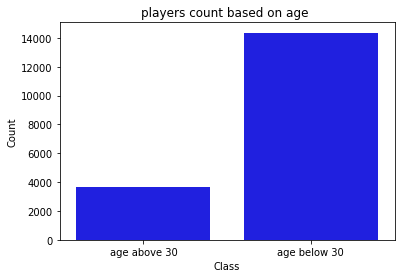

In [96]:
# plotting count plot based on the age of the players 
ax = sns.countplot(x = "class", color = "b", data = data)
ax.set(title = 'players count based on age ', xlabel = 'Class', ylabel = 'Count')

[Text(0,0.5,'age'),
 Text(0.5,0,'skill_moves'),
 Text(0.5,1,'Box plot of age by skill_moves')]

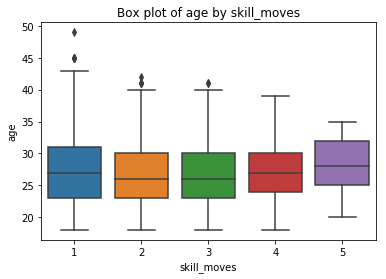

In [99]:
# plot box plot
ax = sns.boxplot(x = 'skill_moves', y = 'age', data = data)
ax.set(title = 'Box plot of age by skill_moves', xlabel = 'skill_moves', ylabel = 'age')

[Text(0,0.5,'skill_moves'),
 Text(0.5,0,'international_reputation'),
 Text(0.5,1,'Box plot of skill_moves by international_reputation')]

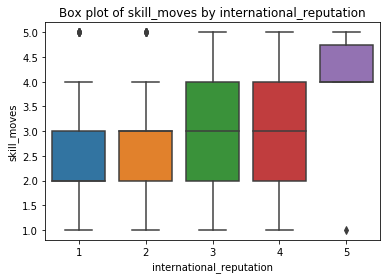

In [106]:
ax = sns.boxplot(x = 'international_reputation', y = 'skill_moves', data = data)
ax.set(title = 'Box plot of skill_moves by international_reputation', xlabel = 'international_reputation', ylabel = 'skill_moves')

[Text(0,0.5,'Count'),
 Text(0.5,0,'Class'),
 Text(0.5,1,'Work rate attack by players age')]

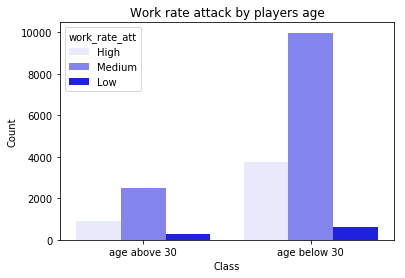

In [32]:
# plot grouped bar chart
ax = sns.countplot(x = "class", hue = 'work_rate_att', color = "b", data = data)
ax.set(title = 'Work rate attack by players age', xlabel = 'Class', ylabel = 'Count')

[Text(0,0.5,'Count'),
 Text(0.5,0,'Class'),
 Text(0.5,1,'Work rate defence by players age')]

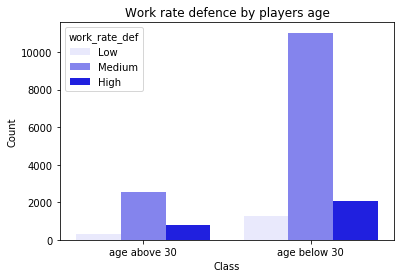

In [101]:
# plot grouped bar chart
ax = sns.countplot(x = "class", hue = 'work_rate_def', color = "b", data = data)
ax.set(title = 'Work rate defence by players age', xlabel = 'Class', ylabel = 'Count')

In [ ]:
#Classifying based on work_rate_attack

In [ ]:
#Building the decision tree 

In [34]:
x_trains, x_test, y_trains, y_test = train_test_split(data[['pac','sho','pas','dri','phy','agility','reactions','balance','shot_power','jumping','stamina','strength','aggression','positioning','lw', 'ls', 'cf', 'st','rf','rw','cam','lm','cm','rm','ram','rcm','lam','vision','penalties','composure','crossing','finishing','heading_accuracy','short_passing','volleys','dribbling','curve','free_kick_accuracy','long_passing','ball_control','acceleration','sprint_speed']],
                                                    data['work_rate_att'], test_size=0.25, random_state = 1)

In [35]:
# scale data
# standardize data
scaler = StandardScaler()
scaler.fit(x_trains)
x_trains = scaler.transform(x_trains) 
x_test = scaler.transform(x_test)
#print([X_train.mean(), X_val.mean()]) # show means
#print([X_train.std(), X_val.std()]) # show standard deviation

C:\Users\anjan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\anjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\anjan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [36]:
sm = SMOTE(ratio = 1)
x_train, y_train = sm.fit_sample(x_trains, y_trains)

C:\Users\anjan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [37]:
# CLASSIFIER: Decision tree
# build decision tree
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth= 50)
model.fit(x_train, y_train)
# predict class labels using decision tree
y_pred = model.predict(x_test)

In [38]:
# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 621   35  492]
 [  16   67  110]
 [ 762  341 2055]]


0.6096910424538786
0.3903089575461214
[0.44388849 0.15124153 0.77342868]
[0.54094077 0.34715026 0.65072831]
[0.48763251 0.21069182 0.70679278]


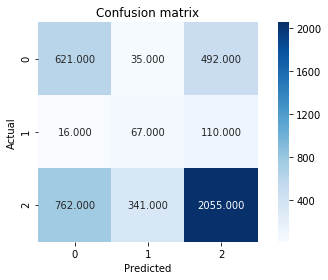

In [39]:
# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
# compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

In [40]:
# CLASSIFIER: Random forest
# build random forest
model = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0, max_depth= 50)
model.fit(x_train, y_train)
# predict class labels using decision tree
y_pred = model.predict(x_test)

In [41]:
# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 773   13  362]
 [   7   85  101]
 [ 789  298 2071]]


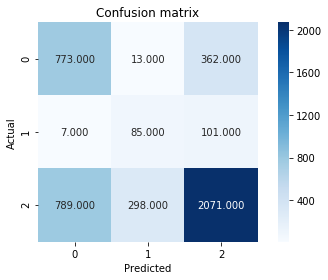

In [42]:
# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [43]:
# compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.6510335630140031
0.34896643698599694
[0.49267049 0.21464646 0.81728493]
[0.67334495 0.44041451 0.65579481]
[0.56900994 0.28862479 0.72768798]


In [44]:
# CLASSIFIER: Logistic Regression
# initialize logistic regression classifier
classifier = LogisticRegression() 
classifier.fit(x_train, y_train)
# predict class labels using logistic regression classifier
y_pred = classifier.predict(x_test)

C:\Users\anjan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anjan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [45]:
# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 963   56  129]
 [  11  170   12]
 [1132  847 1179]]


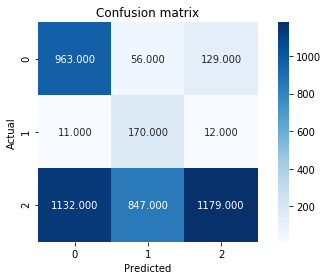

In [46]:
# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [47]:
# compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.5138919759946655
0.4861080240053345
[0.45726496 0.1584343  0.89318182]
[0.83885017 0.88082902 0.37333756]
[0.59188691 0.2685624  0.52657436]


In [48]:
# CLASSIFIER: k-Nearest Neighbors
# initialize k-nearest neighbors classifier
classifier = KNeighborsClassifier(n_neighbors = 6)  
classifier.fit(x_train, y_train)
# predict class labels using k-nearest neighbors classifier
y_pred = classifier.predict(x_test)

In [49]:
# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 930   73  145]
 [  18  143   32]
 [1255  735 1168]]


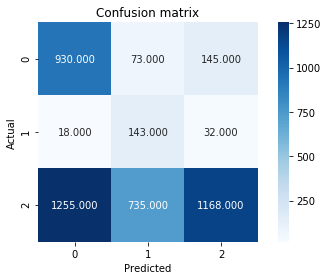

In [50]:
# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [51]:
# compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.4981106912647255
0.5018893087352745
[0.42215161 0.15036803 0.86840149]
[0.81010453 0.74093264 0.36985434]
[0.55505819 0.25       0.51876527]


In [52]:
# CLASSIFIER: Naive Bayes
# initialize Naive Bayes classifier
classifier = GaussianNB()  
classifier.fit(x_train, y_train)
# predict class labels using Naive Bayes classifier
y_pred = classifier.predict(x_test)

[[1010  112   26]
 [  39  147    7]
 [1554  961  643]]


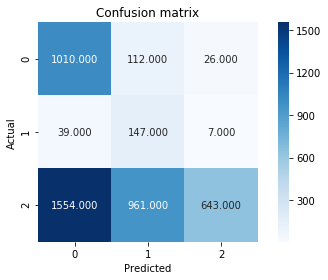

In [53]:
# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [54]:
# compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.40008890864636587
0.5999110913536341
[0.38801383 0.1204918  0.95118343]
[0.87979094 0.76165803 0.20360988]
[0.53852306 0.20806794 0.33541993]


In [ ]:
#Classifying based on work_rate_defence

In [61]:
x_train, x_test, y_train, y_test = train_test_split(data[['pac','pas','def','phy','agility','reactions','balance','shot_power','jumping','stamina','strength','aggression','interceptions','positioning','rs','rw','rf','rcm','rm','rdm','rcb','rb','rwb','st','lw','cf','cm','lm','cdm','cb','lb','lwb','ls','lf',
'lcm','ldm','lcb','interceptions','positioning','vision','composure','marking','standing_tackle','sliding_tackle','crossing','finishing','heading_accuracy','short_passing','volleys','dribbling','long_passing','ball_control','acceleration','sprint_speed']],data['work_rate_def'], test_size=0.30, random_state = 1)

In [63]:
# standardize data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [57]:
sm = SMOTE(ratio = 1)
x_train, y_train = sm.fit_sample(x_trains, y_trains)

C:\Users\anjan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [64]:
# CLASSIFIER: Decision tree
# build decision tree
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth= 50)
model.fit(x_train, y_train)
# predict class labels using decision tree
y_pred = model.predict(x_test)

[[ 309   26  522]
 [  32  120  324]
 [ 509  350 3207]]


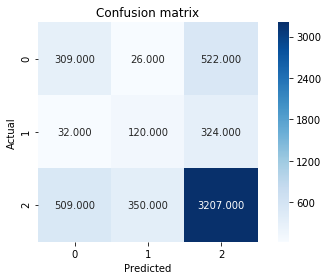

In [65]:
# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [66]:
# compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.6734580477866271
0.3265419522133729
[0.36352941 0.24193548 0.79126573]
[0.36056009 0.25210084 0.78873586]
[0.36203866 0.24691358 0.78999877]


In [67]:
# CLASSIFIER: Random forest
# build random forest
model = RandomForestClassifier(n_estimators = 2, criterion = "entropy", random_state = 1, max_depth= 50)
model.fit(x_train, y_train)
# predict class labels using decision tree
y_pred = model.predict(x_test)

[[ 434   43  380]
 [  53  166  257]
 [ 912  558 2596]]


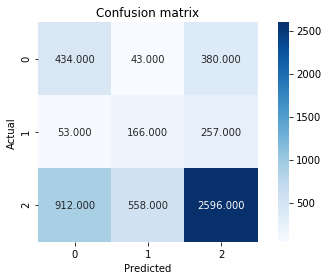

In [68]:
# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [69]:
# compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.5919614743471013
0.40803852565289866
[0.31022159 0.21642764 0.80296938]
[0.50641774 0.3487395  0.63846532]
[0.38475177 0.26709574 0.71133032]


In [70]:
# CLASSIFIER: k-Nearest Neighbors
# initialize k-nearest neighbors classifier
#for i in range(2,50):
classifier = KNeighborsClassifier(n_neighbors = 4)  
classifier.fit(x_train, y_train)
    # predict class labels using k-nearest neighbors classifier
y_pred = classifier.predict(x_test) 
    # compute confusion matrix
    #conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    #print(conf_matrix)
    #print(metrics.accuracy_score(y_test, y_pred)) # accuracy
    
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.6914243378403409
0.30857566215965915
[0.40581542 0.26236559 0.79411055]
[0.37456243 0.25630252 0.80914904]
[0.38956311 0.25929862 0.80155926]


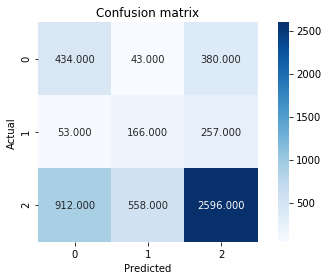

In [71]:
# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [72]:
# compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.6914243378403409
0.30857566215965915
[0.40581542 0.26236559 0.79411055]
[0.37456243 0.25630252 0.80914904]
[0.38956311 0.25929862 0.80155926]


In [73]:
# CLASSIFIER: Naive Bayes
# initialize Naive Bayes classifier
classifier = GaussianNB()  
classifier.fit(x_train, y_train)
# predict class labels using Naive Bayes classifier
y_pred = classifier.predict(x_test)
# compute confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(metrics.accuracy_score(y_test, y_pred)) # accuracy

[[ 698  102   57]
 [  42  405   29]
 [1771 1291 1004]]
0.39025745508427484


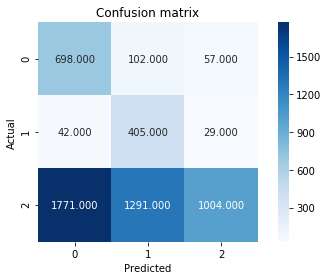

In [74]:
# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [75]:
# compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score

0.39025745508427484
0.6097425449157252
[0.2779769  0.22525028 0.92110092]
[0.81446908 0.85084034 0.24692573]
[0.41448931 0.35620053 0.38944919]
